# **📊 Customer Churn Prediction – Telecom Industry**
###  📌 Objective: Analyze telecom customer churn data to identify patterns and predict high-risk customers who might leave.



## 🔑 Key Tasks & Steps

### 1️⃣ Load and Clean the Dataset
- Load the dataset using **Pandas**.
- Handle **missing values** and **incorrect data types**.

### 2️⃣ Analyze Subscription Length of Churned vs. Retained Customers
- Compare the **average subscription length** for **Churned ("Yes")** and **Retained ("No")** customers.
- Visualize the difference using **bar charts**.

### 3️⃣ Identify High-Risk Churn Customers
- Find customers with **high monthly bills** and **short subscription lengths**.
- These customers are **more likely** to churn.
- Use **statistical methods and visualizations** to highlight patterns.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
churn_data = pd.read_csv("./Datasets/churn_data.csv")
churn_data

,ID,Age,Subscription_Length,Monthly_Bill,Churn
0,1001,25,12,40,No
1,1002,30,24,60,Yes
2,1003,45,36,80,No
3,1004,50,6,100,Yes
4,1005,29,18,50,No
5,1006,41,30,75,Yes
6,1007,35,20,55,No
7,1008,60,5,120,Yes
8,1009,33,15,45,No
9,1010,27,10,35,Yes


In [4]:
churn_data.isnull()

,ID,Age,Subscription_Length,Monthly_Bill,Churn
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [5]:
churn_data.drop_duplicates(inplace=True)
churn_data


,ID,Age,Subscription_Length,Monthly_Bill,Churn
0,1001,25,12,40,No
1,1002,30,24,60,Yes
2,1003,45,36,80,No
3,1004,50,6,100,Yes
4,1005,29,18,50,No
5,1006,41,30,75,Yes
6,1007,35,20,55,No
7,1008,60,5,120,Yes
8,1009,33,15,45,No
9,1010,27,10,35,Yes


In [6]:
churn_retained = churn_data.groupby(churn_data["Churn"])["Subscription_Length"].mean()

In [7]:
churn_retained

Churn
No     20.2
Yes    15.0
Name: Subscription_Length, dtype: float64

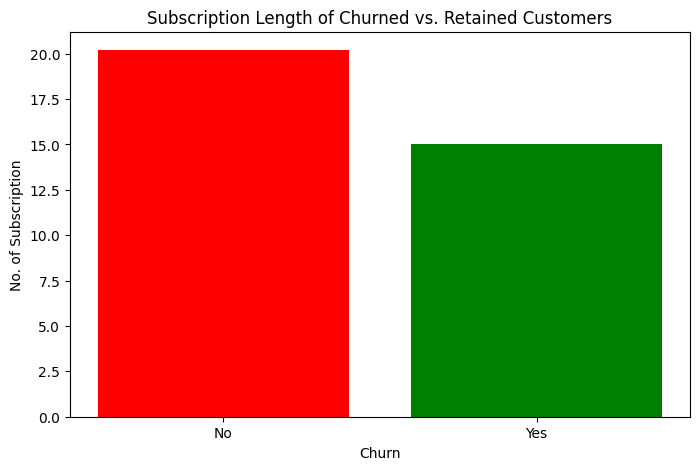

In [8]:
plt.figure(figsize=(8, 5));
plt.xlabel("Churn")
plt.ylabel("No. of Subscription")
plt.title("Subscription Length of Churned vs. Retained Customers")
plt.bar(churn_retained.index, churn_retained.values, color = ['red','green'], label = 'Churned')
plt.show()

In [9]:
churn_data

,ID,Age,Subscription_Length,Monthly_Bill,Churn
0,1001,25,12,40,No
1,1002,30,24,60,Yes
2,1003,45,36,80,No
3,1004,50,6,100,Yes
4,1005,29,18,50,No
5,1006,41,30,75,Yes
6,1007,35,20,55,No
7,1008,60,5,120,Yes
8,1009,33,15,45,No
9,1010,27,10,35,Yes


In [16]:
high_risk_churn = churn_data.loc[(churn_data["Monthly_Bill"]>churn_data["Monthly_Bill"].mean()) & (churn_data["Subscription_Length"]<churn_data["Subscription_Length"].mean()) ]

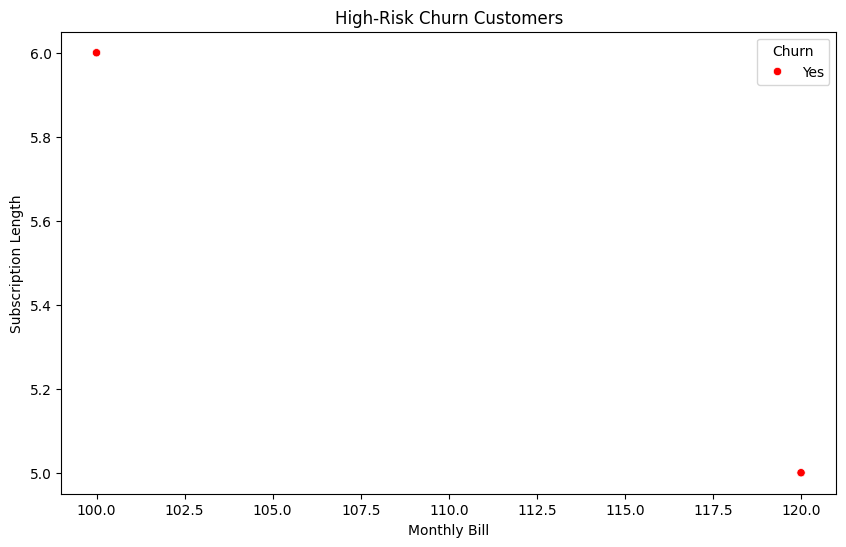

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=high_risk_churn, x="Monthly_Bill", y="Subscription_Length", hue="Churn", palette={"Yes": "red", "No": "blue"})
plt.title("High-Risk Churn Customers")
plt.xlabel("Monthly Bill")
plt.ylabel("Subscription Length")
plt.show()